# Pipeline example

In [1]:
from easycv import Image, Pipeline
from easycv.transforms import Gradient, Blur, Rotate

For this example we will load an image from the [Dog API](https://dog.ceo/dog-api/). For more examples of image loading check [Image examples](image.ipynb).

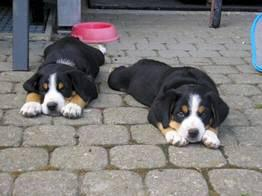

In [2]:
img = Image("https://images.dog.ceo/breeds/entlebucher/n02108000_306.jpg")
img

### Creating pipeline

To create a pipeline we simply call it's constructor with a list of transforms.

In [3]:
pipeline = Pipeline([Gradient(), Blur()], name="test")
pipeline

Pipeline (test) with 2 transforms
    1: Gradient (axis=x, method=sobel, size=5)
    2: Blur (method=gaussian, size=5, sigma=0, sigma_color=75, sigma_space=75)

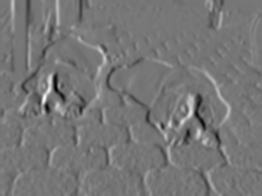

In [4]:
img.apply(pipeline)

We can also create a pipeline with another pipeline inside

In [5]:
pipeline = Pipeline([pipeline, Rotate(degrees=20)],name="test")
pipeline

Pipeline (test) with 3 transforms
    1: Pipeline (test) with 2 transforms
    |    1: Gradient (axis=x, method=sobel, size=5)
    |    2: Blur (method=gaussian, size=5, sigma=0, sigma_color=75, sigma_space=75)
    2: Rotate (degrees=20, scale=1, center=auto, original=True)

And it's possible to add a transform to an existing pipeline 

In [6]:
pipeline.add_transform(Rotate(degrees=-40))
pipeline

Pipeline (test) with 4 transforms
    1: Pipeline (test) with 2 transforms
    |    1: Gradient (axis=x, method=sobel, size=5)
    |    2: Blur (method=gaussian, size=5, sigma=0, sigma_color=75, sigma_space=75)
    2: Rotate (degrees=20, scale=1, center=auto, original=True)
    3: Rotate (degrees=-40, scale=1, center=auto, original=True)

### Number of transforms

You can check the number of transforms in a pipeline. This is the number of Transforms so nested pipelines count as their internal number of Transforms

In [7]:
pipeline.num_transforms()

4

### Clear

You can also remove every transform in a pipeline

In [8]:
pipeline.clear()
pipeline.num_transforms()

0

### Save

If you want you can save a pipeline for future use or sharing

In [10]:
pipeline.save(filename="pipeline")